In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [33]:
## 불공정한 주사위

x_set = np.array([1, 2, 3, 4, 5, 6])

def f(x):
    if x in x_set:
        return x / np.sum(x_set)
    else: 
        return 0

In [3]:
X = [x_set, f]

In [5]:
## 기대값 - 확률 * 확률변수의 합.

np.sum([f(x_k) * x_k for x_k in x_set])

4.333

In [52]:
# 이산확률 변수의 기대값

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set]) #(확률변수 * 확률)의 합

# 이산확률 변수의 분산

def V(X,g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

print(f"불공정한 주사위 기대값: {E(X):.2f}")
print(f"불공정한 주사위 분산: {V(X):.2f}")


def check_prob(X):
    x_set, f = X # X에 확률변수와 확률함수가 정의되어있다.
    prob = np.array([f(x_k) for x_k in x_set]) # 각 확률변수별 확률
    assert np.all(prob >= 0), 'minus probability' # prob의 원소가 모두 0 이상의 값이면 넘어가고 아니면 'minus value'라고 오류
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f"sum of probability{prob_sum}"
    print(f"expected value {E(X):.4}")
    print(f"variance {V(X):.4}")
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    f, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.bar(x_set, prob, label='prob')
    ax.vlines(E(X), 0, 1, label='mean', color='black')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max()*1.2)
    ax.legend()
    
    plt.show()
    


불공정한 주사위 기대값: 0.30
불공정한 주사위 분산: 0.21


In [47]:
# 그래프 선의 종류

linestyles = ['-', '--', ':']

In [48]:
## 베르누이?

def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1-x)
        else:
            return 0
    return x_set, f


In [49]:
p = 0.3
X = Bern(p)
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [50]:
check_prob(X)

expected value 0.3
variance 0.21


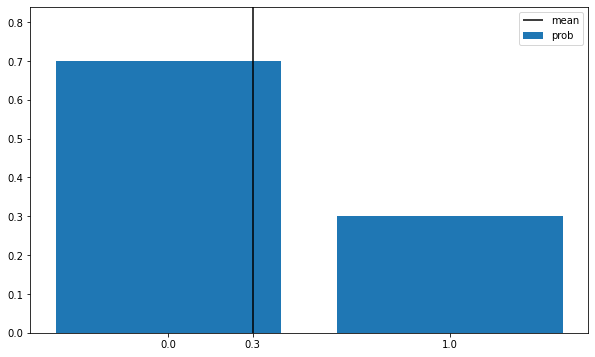

In [53]:
plot_prob(X)

In [55]:
rv = stats.bernoulli(p)
rv

In [59]:
rv.pmf(0), rv.pmf(1), rv.pmf(2), rv.pmf(3)

(0.700, 0.300, 0.000, 0.000)

In [60]:
rv.pmf([0,1])

array([0.7, 0.3])

In [61]:
rv.cdf([0,1])

array([0.7, 1. ])

In [62]:
rv.mean(), rv.var()

(0.300, 0.210)

---

## 이항분포

In [67]:
from scipy.special import comb

1.603

In [68]:
## n - 시행횟수, p - 성공확률

def Bin(n, p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set, f

In [69]:
n = 10
p = 0.3
X = Bin(n, p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [70]:
check_prob(X)

expected value 3.0
variance 2.1


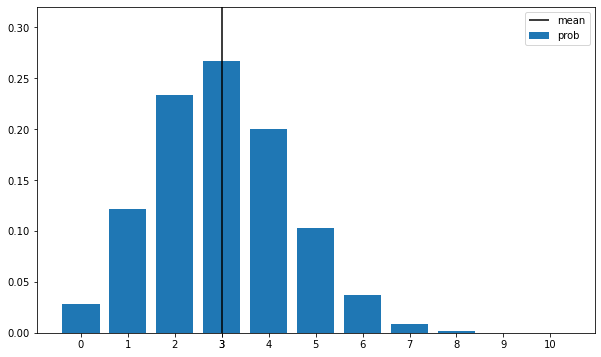

In [71]:
plot_prob(X)

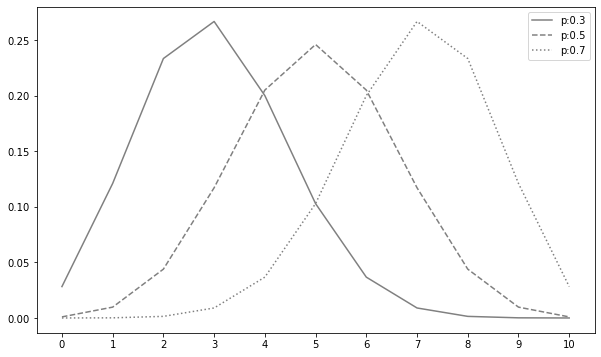

In [73]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))

x_set = np.arange(n+1)
for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f"p:{p}", ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()


plt.show()

## 기하분포

In [77]:
   
def Ge(p):
    x_set = np.arange(1, 30)

    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [78]:
p = 0.5 #성공확률
X = Ge(p)
X

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <function __main__.Ge.<locals>.f(x)>)

In [79]:
check_prob(X)

expected value 2.0
variance 2.0


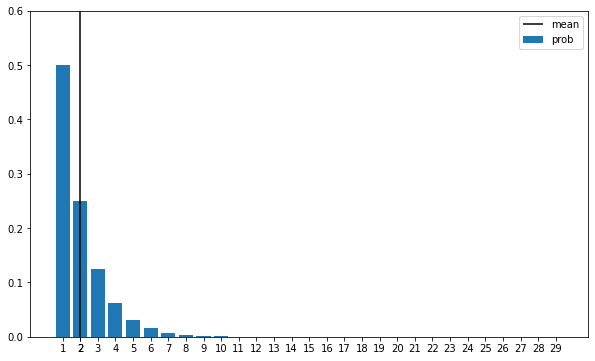

In [80]:
plot_prob(X)

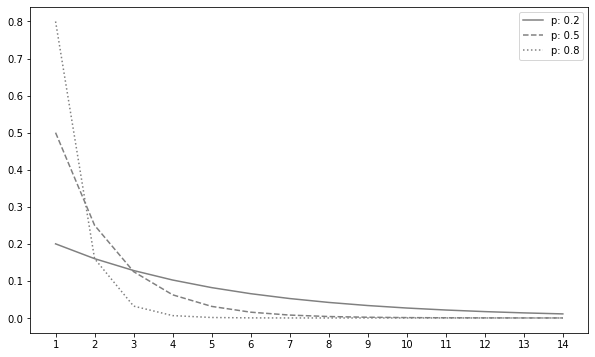

In [82]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label=f"p: {p}", ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()


plt.show()

## 푸아송 분포

푸아송 분포는 주어진 시간 내에 어던 사건이 일어나는 횟수를 나타내는 `이산확률분포`이다.

모수가 (n,p)인 이항분포에서 n이 크고 p가 작아 np가 적당한 크기이면, 푸아송 분포를 이용하여 근삿값을 구할 수 있다. 이러한 성질 때문에 푸아송 분포는 많은 분야에 응용되고 있다.

푸아송 분포는 주어진 시간뿐만 아니라, 주어진 길이, 넓이, 부피 안에 어떤 사건의 횟수를 나타내는 데에 사용할 수도 있다.



In [83]:
from scipy.special import factorial

def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [84]:
lam = 3
X = Poi(lam)

In [85]:
check_prob(X)

expected value 3.0
variance 3.0


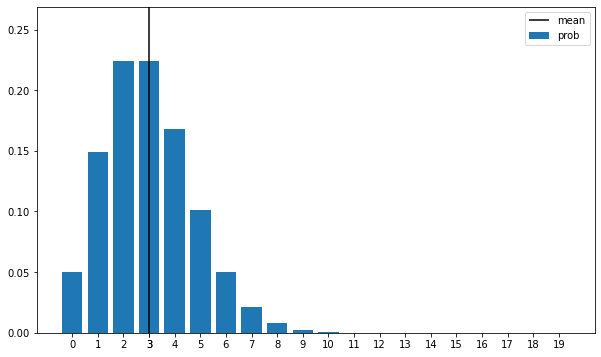

In [86]:
plot_prob(X)

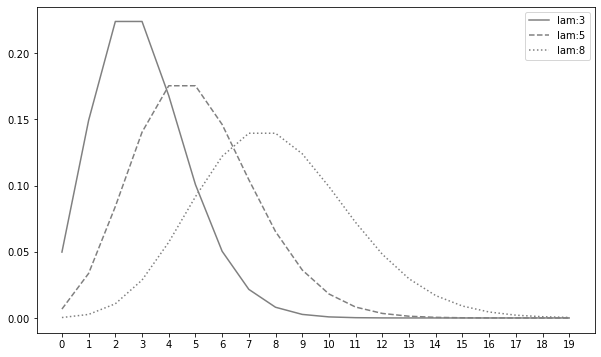

In [87]:
f, ax = plt.subplots(1, 1, figsize = (10, 6))

x_set = np.arange(20)
for lam, ls in zip([3,5,8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f"lam:{lam}", ls=ls, color='gray')
ax.set_xticks(x_set)
ax.legend()

plt.show()